In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt
import seaborn as sns
p1 = Path.cwd() / 'back_data'

In [3]:
# 불리언 배열이란 원시 데이터와 동일한 인덱스를 가진 Series지만, 값은 True / False로 구성 -> 불리언 값을 가진 Series

In [4]:
movie = pd.read_csv(p1 / 'movie.csv', index_col='movie_title')

In [5]:
# 비교 연산자 대신 gt() 메서드 활용 -> 메서드 체인에 유용
movie_2_hours = movie['duration'].dropna().gt(120)
# 파이썬은 True와 False를 각각 1, 0으로 계산 -> 합, 평균 수치 가능
movie_2_hours.sum(), movie_2_hours.mean() * 100, movie_2_hours.describe()

(1039,
 21.199755152009793,
 count      4901
 unique        2
 top       False
 freq       3862
 Name: duration, dtype: object)

In [6]:
# 파이썬에서 불리언 표현식은 and, or, not 이용 -> but pandas 불리언 인덱스에서는 &, |, ~ 로 대체
# and, or, not을 쓰면 객체 전체(Series 전체)의 truthiness를 찾으려고 시도 -> 이치에 맞지 않고 개별 값의 True / False를 찾아야
# '&, |, ~' 등 비트별 연산자는 비교 연산자보다 우선순위가 높으므로 괄호 필요
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = (movie.title_year < 2000) | (movie.title_year > 2009)
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [7]:
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3
final_crit_all = final_crit_a | final_crit_b
# 불리언 배열을 활용한 필터링 가능 -> 인덱스 직접 연산 혹은 loc 속성 활용 가능, 가급적 loc 속성 활용
movie[final_crit_all].head(), movie.loc[final_crit_all].head(), movie.loc[final_crit_all, ['imdb_score', 'content_rating', 'title_year']].head()

(                            color      director_name  num_critic_for_reviews  \
 movie_title                                                                    
 The Dark Knight Rises       Color  Christopher Nolan                   813.0   
 The Avengers                Color        Joss Whedon                   703.0   
 Captain America: Civil War  Color      Anthony Russo                   516.0   
 Guardians of the Galaxy     Color         James Gunn                   653.0   
 Interstellar                Color  Christopher Nolan                   712.0   
 
                             duration  director_facebook_likes  \
 movie_title                                                     
 The Dark Knight Rises          164.0                  22000.0   
 The Avengers                   173.0                      0.0   
 Captain America: Civil War     147.0                     94.0   
 Guardians of the Galaxy        121.0                    571.0   
 Interstellar                   169

In [8]:
# iloc 속성은 불리언 배열 미지원, but numpy 배열에서는 작동하므로 to_numpy() 이용하여 가능
movie.iloc[final_crit_all.to_numpy()].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


In [9]:
college = pd.read_csv(p1 / 'college.csv')
college2 = pd.read_csv(p1 / 'college.csv', index_col='STABBR')

In [10]:
# 불리언 배열을 활용한 필터링과 인덱스를 활용한 필터링
college[college['STABBR'] == 'TX'].head(), college2.loc['TX'].head()

(                            INSTNM        CITY STABBR  HBCU  MENONLY  \
 3610  Abilene Christian University     Abilene     TX   0.0      0.0   
 3611       Alvin Community College       Alvin     TX   0.0      0.0   
 3612              Amarillo College    Amarillo     TX   0.0      0.0   
 3613              Angelina College      Lufkin     TX   0.0      0.0   
 3614       Angelo State University  San Angelo     TX   0.0      0.0   
 
       WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  ...  UGDS_2MOR  \
 3610        0.0         1     530.0     545.0           0.0  ...     0.0454   
 3611        0.0         0       NaN       NaN           0.0  ...     0.0002   
 3612        0.0         0       NaN       NaN           0.0  ...     0.0000   
 3613        0.0         0       NaN       NaN           0.0  ...     0.0264   
 3614        0.0         0     475.0     490.0           0.0  ...     0.0285   
 
       UGDS_NRA  UGDS_UNKN  PPTUG_EF  CURROPER  PCTPELL  PCTFLOAN  UG25ABV  \


In [11]:
# %timeit 방식을 이용하여 속도 비교 가능 -> 불리언 배열 활용 방식이 약간 더 느리나, 인덱스 설정 시간 감안하면 우위일수도
# 단 불리언 배열을 활용하면 인덱스 선택보다 더 많은 유연성 제공 -> 여러 열을 조건으로 할 수 있는 등
%timeit college[college['STABBR'] == 'TX']
%timeit college2.loc['TX']

471 µs ± 982 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
438 µs ± 424 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [12]:
states = ['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)].head(), college2.loc[states].head()

(                                             INSTNM              CITY STABBR  \
 192                       Academy of Art University     San Francisco     CA   
 193          ITT Technical Institute-Rancho Cordova    Rancho Cordova     CA   
 194  Academy of Chinese Culture and Health Sciences           Oakland     CA   
 195        The Academy of Radio and TV Broadcasting  Huntington Beach     CA   
 196            Avalon School of Cosmetology-Alameda           Alameda     CA   
 
      HBCU  MENONLY  WOMENONLY  RELAFFIL  SATVRMID  SATMTMID  DISTANCEONLY  \
 192   0.0      0.0        0.0         0       NaN       NaN           0.0   
 193   0.0      0.0        0.0         0       NaN       NaN           0.0   
 194   0.0      0.0        0.0         0       NaN       NaN           0.0   
 195   0.0      0.0        0.0         0       NaN       NaN           0.0   
 196   0.0      0.0        0.0         0       NaN       NaN           0.0   
 
      ...  UGDS_2MOR  UGDS_NRA  UGDS_UNKN 

In [13]:
# 인덱스가 정렬되어 있으면 인덱스 선택 성능이 크게 향상 -> '이진 검색'이라는 알고리즘 활용
college3 = college2.sort_index()
college3.index.is_monotonic_increasing

True

In [14]:
# 여러개를 찾아야 할 경우에는 불리언 배열 형태가 일반 인덱스에 비해서는 효율적, 정렬된 인덱스에 비해서는 비효율적
%timeit college[college['STABBR'].isin(states)]
%timeit college2.loc[states]
%timeit college3.loc[states]

506 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
702 µs ± 662 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
362 µs ± 696 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [15]:
# 고유한 인덱스의 성능 확인
college4 = pd.read_csv(p1 / 'college.csv', index_col='INSTNM')

In [16]:
# 불리언 배열을 활용한 정렬보다 고유한 인덱스를 활용한 정렬이 더 효율적
%timeit college[college['INSTNM'] == 'Stanford University']
%timeit college4.loc[['Stanford University']]

429 µs ± 3.07 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
240 µs ± 7.47 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
crit1 = college['CITY'] == 'Miami'
crit2 = college['STABBR'] == 'FL'
college[crit1 & crit2].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
713,Barry University,Miami,FL,0.0,0.0,0.0,1,470.0,462.0,0.0,...,0.0164,0.0741,0.0841,0.1518,1,0.5045,0.6733,0.4361,44100,28250
722,Carlos Albizu University-Miami,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0191,0.0305,0.5115,1,0.5850,0.7755,0.6701,29100,25000
747,Florida International University,Miami,FL,0.0,0.0,0.0,0,545.0,535.0,0.0,...,0.0228,0.0521,0.0092,0.3520,1,0.5642,0.4628,0.2698,43700,17250
750,Florida Career College-Miami,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0109,0.0002,0.0132,0.0000,1,0.7490,0.6755,0.6511,30100,9500
761,George T Baker Aviation Technical College,Miami,FL,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0046,0.0000,0.0000,0.5686,1,0.2567,0.0000,0.4366,38600,PrivacySuppressed


In [18]:
employee = pd.read_csv(p1 / 'employee.csv')

In [19]:
depts = ['Houston Police Department-HPD', 'Houston Fire Department (HFD)']
# 경찰서, 소방서 부서만 불리언 배열 진행 -> isin() 메서드의 경우 SQL IN 연산자와 동일
criteria_dept = employee['DEPARTMENT'].isin(depts)
# 성별이 여성인 경우만 불리언 배열 진행
criteria_gender = employee['GENDER'] == 'Female'
# 기본급이 8만에서 12만 사이인 경우 불리언 배열 진행 -> '&'도 활용 가능하나, between() 메서드 활용
# 단 pandas 내 query() 메서드에서는 between 활용 불가능
criteria_sal = employee['BASE_SALARY'].between(80000, 120000)
criteria_final = (criteria_dept & criteria_gender & criteria_sal)
select_columns = ['UNIQUE_ID', 'DEPARTMENT', 'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [20]:
# 불리언 인덱싱 대신 query() 메서드 활용 가능 -> query() 메서드를 통해 좀 더 명확성을 제공하는 대체 문자열 기반 구문
# 경찰서/소방서, 여성, 기본급 8만-12만 복제 진행
(employee
# '@' 기호를 통해 pandas 객체(기존 설정한 detps)를 사용 가능, between은 사용 불가
# in, and 등의 경우 꼭 소문자여야 가능
.query("DEPARTMENT in @depts and GENDER == 'Female' and 80000 <= BASE_SALARY <= 120000")
.loc[:, select_columns]
.head()
)

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston Fire Department (HFD),Female,96668.0
136,136,Houston Police Department-HPD,Female,81239.0
367,367,Houston Police Department-HPD,Female,86534.0
474,474,Houston Police Department-HPD,Female,91181.0
513,513,Houston Police Department-HPD,Female,81239.0


In [21]:
movie = pd.read_csv(p1 / 'movie.csv', index_col='movie_title')
fb_likes = movie.loc[:, 'actor_1_facebook_likes'].dropna()
# 통계량 확인하여 max값(혹은 mean과 median)을 보면 오른쪽으로 꼬리가 길게 늘어진 형태임을 확인 가능 -> clip() 메서드 활용 가능
fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

<AxesSubplot:ylabel='Frequency'>

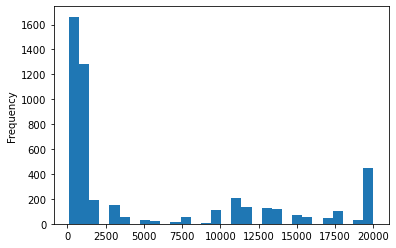

In [23]:
# where() 메서드를 활용해 True인 경우 기존 값을, False인 경우 두 번째 인자(other 파라미터) 값을 전달
# mask() 메서드를 활용하면 where() 메서드와 반대 형태 실행 가능
(fb_likes
.where(fb_likes < 20000, 20000)
.where(fb_likes > 100, 100)
# hist()에 bins 파라미터 활용하여 계급구간 수 결정 가능
.plot.hist(bins=30)
)

<AxesSubplot:ylabel='Frequency'>

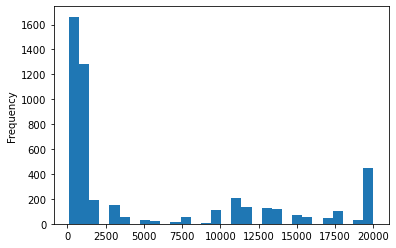

In [24]:
# clip() 메서드를 활용하여 복제 가능
(fb_likes
.clip(lower=100, upper=20000)
.plot.hist(bins=30)
)

<AxesSubplot:ylabel='Frequency'>

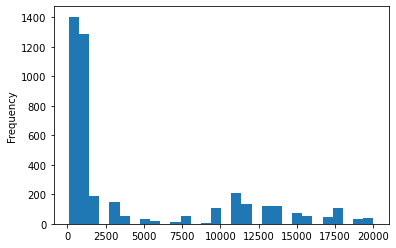

In [25]:
# plot.hist() 메서드에 range 파라미터 활용하여 인자 전달하여 비슷하게 진행 가능 -> 미해당 값은 전부 제외처리인 점이 차이
(fb_likes
.plot.hist(bins=30, range=(100, 20000))
)

In [29]:
c1 = movie['title_year'] >= 2010
c2 = movie['title_year'].isna()
criteria = c1 | c2
# 일정 열을 선택하기 위해 type이 int인 열만 선택
criteria_col = movie.select_dtypes(include='int').columns
# 불리언 배열 및 loc 속성을 사용하여 행과 열 모두 필터링 가능
movie.loc[criteria, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0
John Carter,212204,1873,24000
Tangled,294810,2036,29000


In [31]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
# iloc 속성을 활용하기 위해서는 불리언 배열은 to_numpy() 활용, 열 이름은 정수로 변환 필요(columns 속성의 get_loc() 메서드 및 list comprehension 활용)
movie.iloc[criteria.to_numpy(), [movie.columns.get_loc(col) for col in cols]]

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Spectre,PG-13,6.8,2015.0,200074175.0
The Dark Knight Rises,PG-13,8.5,2012.0,448130642.0
Star Wars: Episode VII - The Force Awakens,NaN,7.1,NaN,NaN
John Carter,PG-13,6.6,2012.0,73058679.0
Tangled,PG,7.8,2010.0,200807262.0
...,...,...,...,...
Newlyweds,Not Rated,6.4,2011.0,4584.0
Signed Sealed Delivered,NaN,7.7,2013.0,NaN
The Following,TV-14,7.5,NaN,NaN
